In [1]:
import os
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Set the path to your dataset
data_dir = r"C:\Users\Saurav\Documents\predictive analytics project\dataset\images_train_test_val"
test_dir = os.path.join(data_dir, 'test')
train_dir = os.path.join(data_dir, 'train')
val_dir = os.path.join(data_dir, 'validation')

# Define image size and batch size
IMG_SIZE = 256
BATCH_SIZE = 32
NUM_CLASSES = 21

# Define data augmentation and normalization
datagen = ImageDataGenerator(rescale=1./255)

# Load training data
train_data = datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# Load testing data
test_data = datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# Load validation data
val_data = datagen.flow_from_directory(
    val_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

Found 7350 images belonging to 21 classes.
Found 1050 images belonging to 21 classes.
Found 2100 images belonging to 21 classes.


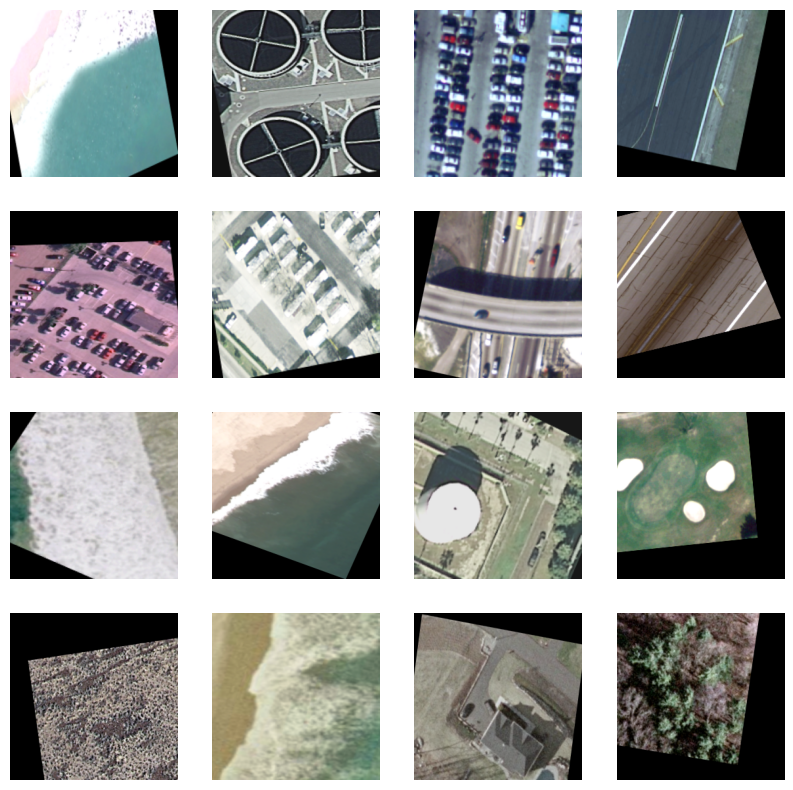

In [2]:
plt.figure(figsize=(10,10))
for i in range(16):
    ax = plt.subplot(4,4,i+1)
    k = random.randrange(10)
    j = random.randrange(21)
    plt.imshow(train_data[j][0][k])
    plt.axis('off')

In [3]:
train_data.class_indices

{'agricultural': 0,
 'airplane': 1,
 'baseballdiamond': 2,
 'beach': 3,
 'buildings': 4,
 'chaparral': 5,
 'denseresidential': 6,
 'forest': 7,
 'freeway': 8,
 'golfcourse': 9,
 'harbor': 10,
 'intersection': 11,
 'mediumresidential': 12,
 'mobilehomepark': 13,
 'overpass': 14,
 'parkinglot': 15,
 'river': 16,
 'runway': 17,
 'sparseresidential': 18,
 'storagetanks': 19,
 'tenniscourt': 20}

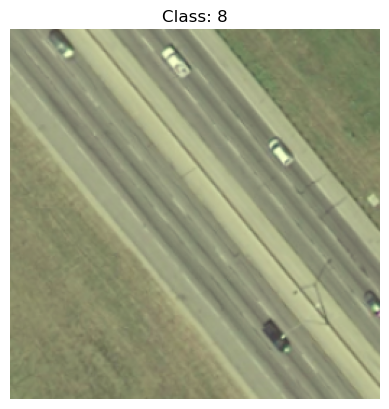

In [4]:
images, labels = next(train_data)  # This gets one batch of data (32 images and labels)
single_image = images[0] 

# Visualize the single image
plt.imshow(single_image)
plt.title(f'Class: {np.argmax(labels[0])}')
plt.axis('off') 
plt.show()

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),

    Dense(256, activation='relu'),
    Dropout(0.5),

    Dense(NUM_CLASSES, activation='softmax')  # Output layer with 21 classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


C:\Users\Saurav\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    29,491,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 21)             │         5,397 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,590,101 (112.88 MB)

 Trainable params: 29,590,101 (112.88 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
model.add(Dense(NUM_CLASSES, activation='softmax'))  # Ensure NUM_CLASSES is set correctly


In [7]:
train_data = datagen.flow_from_directory(
    data_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',  # This ensures one-hot encoding
    subset='training'
)


Found 10500 images belonging to 3 classes.


In [8]:
history = model.fit(train_data, validation_data=val_data, epochs=4)



Epoch 1/4


ValueError: Arguments `target` and `output` must have the same shape. Received: target.shape=(None, 3), output.shape=(None, 21)

In [ ]:
# Define a color map for the 21 classes (use RGB format)
color_map = {
    "agricultural": (255, 0, 0),        # Red
    "airplane": (0, 255, 0),            # Green
    "baseballdiamond": (0, 0, 255),     # Blue
    "beach": (255, 255, 0),             # Yellow
    "buildings": (255, 0, 255),         # Magenta
    "chaparral": (0, 255, 255),         # Cyan
    "denseresidential": (128, 0, 0),    # Dark Red
    "forest": (0, 128, 0),              # Dark Green
    "freeway": (0, 0, 128),             # Dark Blue
    "golfcourse": (128, 128, 0),        # Olive
    "intersection": (128, 0, 128),      # Purple
    "mediumresidential": (0, 128, 128), # Teal
    "mobilehomepark": (192, 192, 192),  # Silver
    "overpass": (128, 128, 128),        # Gray
    "parkinglot": (255, 165, 0),        # Orange
    "river": (70, 130, 180),            # Steel Blue
    "runway": (0, 255, 127),            # Spring Green
    "sparseresidential": (255, 20, 147),# Deep Pink
    "storagetanks": (75, 0, 130),       # Indigo
    "tenniscourt": (244, 164, 96),      # Sandy Brown
    "harbor": (0, 255, 255)             # Cyan
}



def class_to_color(class_idx):
    for key, value in color_map.items():
        if train_data.class_indices[key] == class_idx:
            return value


In [ ]:
from PIL import Image

def predict_and_visualize(image_path):
    # Load and preprocess the input image
    img = Image.open(image_path).resize((IMG_SIZE, IMG_SIZE))
    img_array = np.array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    
    # Predict the class
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions)

    # Generate the color-coded map
    color = class_to_color(predicted_class)
    
    # Create a color-coded image
    color_image = np.full((IMG_SIZE, IMG_SIZE, 3), color, dtype=np.uint8)

    # Show the original and color-coded images
    plt.figure(figsize=(8, 4))
    
    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(img)
    
    plt.subplot(1, 2, 2)
    plt.title('Color-Coded Map')
    plt.imshow(color_image)
    
    plt.show()

# Test the function with a random image
predict_and_visualize(r"C:\Users\Saurav\Documents\predictive analytics project\dataset\images_train_test_val\test\agricultural\agricultural_000102.png")
